# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [1]:
# coding: UTF-8

########## Function Part1 (Data Load) ################## 
import os
print(os.sys.path)

# Load pickled data

import platform
print('python_version',platform.python_version())

# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file =  './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('X_train',X_train.shape,type(X_train))
print('y_train',y_train.shape,type(y_train))
print('X_valid',X_valid.shape,type(X_valid))

print('y_valid',y_valid.shape,type(y_valid))
print('X_test',X_test.shape,type(X_test))
print('y_test',y_test.shape,type(y_test))

['', '/home/kshiba/conda/lib/python3.6/site-packages', '/home/kshiba/catkin_ws/devel/lib/python2.7/dist-packages', '/opt/ros/indigo/lib/python2.7/dist-packages', '/home/kshiba/conda/envs/IntroToTensorFlow/lib/python36.zip', '/home/kshiba/conda/envs/IntroToTensorFlow/lib/python3.6', '/home/kshiba/conda/envs/IntroToTensorFlow/lib/python3.6/lib-dynload', '/home/kshiba/conda/envs/IntroToTensorFlow/lib/python3.6/site-packages', '/home/kshiba/conda/envs/IntroToTensorFlow/lib/python3.6/site-packages/IPython/extensions', '/home/kshiba/.ipython']
python_version 3.6.3
X_train (34799, 32, 32, 3) <class 'numpy.ndarray'>
y_train (34799,) <class 'numpy.ndarray'>
X_valid (4410, 32, 32, 3) <class 'numpy.ndarray'>
y_valid (4410,) <class 'numpy.ndarray'>
X_test (12630, 32, 32, 3) <class 'numpy.ndarray'>
y_test (12630,) <class 'numpy.ndarray'>


In [2]:

########## Function Part2 (signnames Load) ################## 
import numpy as np
import csv

xlist=[]
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f) # リストで読まれる
    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for row in reader:
        xlist.append(row)
        #print(row[0],row[1])
        #print(row)
        
print(xlist[y_train[1000]][1],'&',xlist[y_valid[1000]][1])



Go straight or right & Speed limit (70km/h)


cv2.version 3.1.0
X_train[0].shape (32, 32, 3)
X_train.shape (34799, 32, 32, 3)
 len(X_train.shape) 4
################
X_train.shape[ 0 ] 34799
X_train.shape[ 1 ] 32
X_train.shape[ 2 ] 32
X_train.shape[ 3 ] 3


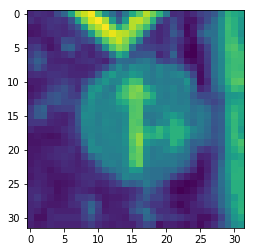

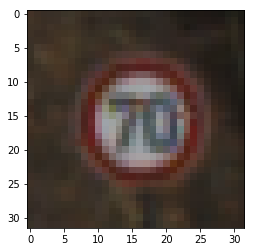

(32, 32, 3)
tapple
################
dict_keys(['coords', 'labels', 'features', 'sizes'])
coords
features
labels
sizes
dict_keys(['coords', 'labels', 'features', 'sizes'])
dict_keys(['sizes', 'coords', 'features', 'labels'])
################
(34799, 32, 32, 3) (4410, 32, 32, 3) (12630, 32, 32, 3)
(34799,) (4410,) (12630,)
36 4
Go straight or right & Speed limit (70km/h)


In [3]:
########## My Check Code Debug (Skipable)##################
import pickle
import matplotlib.pyplot as plt

import sys
##sys.path.append('/usr/local/lib/python2.7/site-packages')
##sys.path.append('/home/kshiba/conda/lib/python3.6/site-packages')
import cv2
print('cv2.version',cv2.__version__)

#print(len(train))#print(train)
#print(len(valid))#print(valid)
#print(len(test))#print(test)
#print(len(train['features']) )

#print(X_train[:,:,:,:])
#X_train[0,:,:,:].shape[2]

print('X_train[0].shape',X_train[0].shape)
print('X_train.shape' ,X_train.shape )
print(' len(X_train.shape)', len(X_train.shape))

print('################')        
for i in range(len(X_train.shape) ):
    print('X_train.shape[',i,']',X_train.shape[i] )

#print(X_train[0,:,:,0])
plt.imshow(X_train[1000,:,:,2])
plt.show()

plt.imshow(X_valid[1000,:,:,:])
plt.show()



print(X_train.shape[1:4])
if  X_train.shape[1:3]==(32,32):
     print('tapple')
else:
     print('other')
print('################')        
print(train.keys())
for i in range(len(train.keys())):
    print(sorted(train.keys())[i])
    
print(valid.keys())
print(test.keys())
print('################')        


print(X_train.shape,X_valid.shape,X_test.shape)
print(y_train.shape,y_valid.shape,y_test.shape)
print(y_train[1000],y_valid[1000],)

        
print(xlist[y_train[1000]][1],'&',xlist[y_valid[1000]][1])


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
########## Function Part3 (Set Num of Sys-Param & Basic Summary) ################## 

import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))    #label'num = class's num

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

24031 y_train[index],xlist[y_train[index]------- 7 ['7', 'Speed limit (100km/h)']
X_train[index] <class 'numpy.ndarray'>
pilImg <class 'PIL.Image.Image'>
(32, 32, 3)
(32, 32)


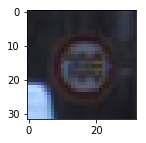

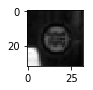

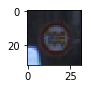

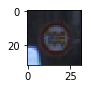

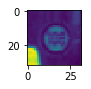

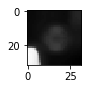

In [5]:
########## My Check Code Debug  (Skipable)##################
# 各データの内訳確認
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


import random
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)  ##plt.imshow(image, cmap="gray")

gray = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(1,2))
plt.imshow(gray, cmap="gray")



from PIL import Image
import numpy as np

print(index,'y_train[index],xlist[y_train[index]-------',y_train[index],xlist[y_train[index]])

print('X_train[index]',type(X_train[index]) )
pilImg = Image.fromarray(np.uint8(X_train[index]))

plt.figure(figsize=(1,1))
plt.imshow(pilImg)
print('pilImg',type(pilImg) )


plt.figure(figsize=(1,1))
plt.imshow(X_train[index])
print(X_train[index].shape)
gray2 = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(1,1))
plt.imshow(gray)
print(gray.shape)

gray= cv2.bilateralFilter(gray,9,55,55)
        
    
plt.figure(figsize=(1,1))
plt.imshow(gray,cmap='gray')



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
########## Function Part4 (define calculation func) ################## 
import numpy as np
def zscore(x, axis = None):
####　データから平均値をとって標準偏差で割ると正規化    
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore
def min_max(x, axis=None):
####　データからを最大最小差で処理　→　階調補正
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result
###https://deepage.net/features/numpy-normalize.html

(32, 32, 3) <class 'numpy.ndarray'>
(32, 32, 3) <class 'numpy.ndarray'>
(32, 32, 3) <class 'numpy.ndarray'>
D (32, 32, 3)
D (2, 32, 32, 3)
D (3, 32, 32, 3)
<class 'list'>
<class 'numpy.ndarray'>
x_train (10, 32, 32, 3) <class 'numpy.ndarray'>


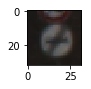

In [8]:
########## My Check Code Debug (Skipable)##################
A=X_train[0]
B=X_train[1]
C=X_train[2]

print(A.shape,type(A))
print(B.shape,type(B))
print(C.shape,type(C))
D= A
print('D',D.shape)
D= np.array([D,B])
print('D',D.shape)
D= np.array([A,B,C])
print('D',D.shape)

##############################################
res=10
x_train = []
for row in range(res):
    x_train_temp =A
    #img_path = img_dir + row['id'] + '.png'
    #x_train_temp = cv2.imread(img_path)
    # x_train = np.append(x_train,x_train_temp,axis=0)
    x_train.append(x_train_temp)

print(type(x_train))    
x_train = np.asarray(x_train) ##list to ndArray
print(type(x_train))  

print('x_train',x_train.shape,type(x_train))

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(1,1))
plt.imshow(x_train[9])
#############################


In [22]:
########## Function Part6 (define calculation func) ################## 
from PIL import Image   #use pilImg
import cv2
import numpy as np
####$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

def MyConvertRGB2NRMGRAY(src,flt):
    #print(src.shape)
    gray= cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    #print(gray.shape,gray.dtype)
    
    #GRAY[1:3]=gray
    
    if(flt==True):
        gray= cv2.bilateralFilter(gray,9,55,55)
    
    gray = zscore(gray)   
    gray = min_max(gray)
    #print(gray.shape,gray.dtype)
        
    GRAY=np.reshape(gray.astype(np.float32),(32,32,1))    
    #print(GRAY.shape,GRAY.dtype)
    
    return GRAY



In [23]:
##debug


x_temp=[]
gray= MyConvertRGB2NRMGRAY(X_test[0], True)

print(type(gray),gray.shape) 
x_temp.append(gray) 
temp = np.asarray(x_temp) ##list to ndArray

print(type(temp),temp.shape)  

"""
test=MyConvertRGB2NRMGRAY(X_train[0],True)
print(type(test),test.shape)
print(test)
"""

<class 'numpy.ndarray'> (32, 32, 1)
<class 'numpy.ndarray'> (1, 32, 32, 1)


'\ntest=MyConvertRGB2NRMGRAY(X_train[0],True)\nprint(type(test),test.shape)\nprint(test)\n'

In [24]:
########## Function Part7(define COLOR_RGB2GRAY func) ################## 
########## [n,32,32,3]のデータを[n,32,32]に変換する
########## メモリの都合があるので1000データずつ処理してpickle配列に格納する

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

# Dump（Save） pickled data
import pickle

##http://blog.amedama.jp/entry/2015/12/05/132520
import io
global file 


def conv_rgb2gray_to_pickleArray1kGroup(rgb_src_list,flag):

    file=np.array([ io.BytesIO() ])

 ################################################
    print(type(rgb_src_list))
    x_temp =[]

    total=rgb_src_list.shape[0]
    print("loop num total",total)
    for i in range( total) :
        gray= MyConvertRGB2NRMGRAY(rgb_src_list[i], flag)
        x_temp.append(gray) 
        
        next=i+1
        if((next%1000)==0):
            ###ndarrayではなく　一旦listでpikle保存
            pickle.dump(x_temp, file[int(i/1000)])
            file=np.append(file,io.BytesIO())
            print("conv",next,"rate",float(next)/float(total))
            #debug用
            tmp=np.asarray(x_temp)
            print('x_temp',type(tmp),tmp.shape)
            #再度初期化リセット
            x_temp =  []
        if(next==total):
            pickle.dump(x_temp, file[int(i/1000)])

    return file

In [25]:
########## My Check Code Debug (Skipable)##################
### conv_rgb2gray_to_pickleArray1kGroup の動作を確認してみる
"""
global file
file=conv_rgb2gray_to_pickleArray1kGroup(X_train,True)
########## My Check Code Debug (Skipable)##################
x_temp =  [] 
file[0].seek(0)
xlist=pickle.load(file[0])
x_temp.extend(xlist)
tmp= np.asarray(x_temp)
print(tmp.shape)#########

file[1].seek(0)
xlist=pickle.load(file[1])
x_temp.extend(xlist)
tmp= np.asarray(x_temp)
print(tmp.shape)#########

plt.figure(figsize=(1,5))
plt.imshow(x_temp[1999])

plt.figure(figsize=(1,5))
plt.imshow(X_train[1999])
"""



'\nglobal file\nfile=conv_rgb2gray_to_pickleArray1kGroup(X_train,True)\n########## My Check Code Debug (Skipable)##################\nx_temp =  [] \nfile[0].seek(0)\nxlist=pickle.load(file[0])\nx_temp.extend(xlist)\ntmp= np.asarray(x_temp)\nprint(tmp.shape)#########\n\nfile[1].seek(0)\nxlist=pickle.load(file[1])\nx_temp.extend(xlist)\ntmp= np.asarray(x_temp)\nprint(tmp.shape)#########\n\nplt.figure(figsize=(1,5))\nplt.imshow(x_temp[1999])\n\nplt.figure(figsize=(1,5))\nplt.imshow(X_train[1999])\n'

In [26]:
# Dump（Save） pickled data
import pickle
import io

def encode_pickleArray1kGroup_to_grayImageArray(file,save_p_file_name):
    num=file.shape
    print(num)
    x_temp =  []
    for i in range(num[0]) :
        file[i].seek(0)
        tmp=pickle.load(file[i])
        x_temp.extend(tmp)


    print(type(x_temp))    
    x_temp = np.asarray(x_temp) ##list to ndArray
    print(type(x_temp),x_temp.shape)
    
    
    with open(save_p_file_name, mode='wb') as f:
        pickle.dump(x_temp, f)
        print("complete");    

    return





In [27]:
########## My Check Code Debug (Skipable)##################
### encode_pickleArray1kGroup_to_grayImageArray の動作を確認してみる
"""
encode_pickleArray1kGroup_to_grayImageArray(file,training_t_file)
train_cnv =[]
with open(training_t_file, mode='rb') as f:
        train_cnv = pickle.load(f)

print(type(train_cnv),train_cnv.shape)
plt.figure(figsize=(1,5))
plt.imshow(train_cnv[1999])
"""

    


"\nencode_pickleArray1kGroup_to_grayImageArray(file,training_t_file)\ntrain_cnv =[]\nwith open(training_t_file, mode='rb') as f:\n        train_cnv = pickle.load(f)\n\nprint(type(train_cnv),train_cnv.shape)\nplt.figure(figsize=(1,5))\nplt.imshow(train_cnv[1999])\n"

In [28]:
import os.path
import pickle
import io

training_t_file = './train_t.p'
validation_t_file='./valid_t.p'
testing_t_file =  './test_t.p'

path=[training_t_file,validation_t_file,testing_t_file]

#グレー化データのファイル有無を確認
flgExist=[os.path.isfile(path[0]),os.path.isfile(path[1]),os.path.isfile(path[2])]

x_train=[]
x_valid=[]
x_test=[]

if(flgExist[0]==False):
    global file
    file=conv_rgb2gray_to_pickleArray1kGroup(X_train,True)
    encode_pickleArray1kGroup_to_grayImageArray(file,path[0])

if(flgExist[1]==False):
    global file
    file=conv_rgb2gray_to_pickleArray1kGroup(X_valid,True)
    encode_pickleArray1kGroup_to_grayImageArray(file,path[1])
    
if(flgExist[2]==False):
    global file
    file=conv_rgb2gray_to_pickleArray1kGroup(X_test,True)
    encode_pickleArray1kGroup_to_grayImageArray(file,path[2])
    
    
with open(path[0], mode='rb') as f:
    x_train = pickle.load(f)

with open(path[1], mode='rb') as f:
    x_valid = pickle.load(f)

with open(path[2], mode='rb') as f:
    x_test = pickle.load(f)
    
print(type(X_test),X_test.shape ,"to ",type(x_test),x_test.shape)
"""
print(type(X_train),X_train.shape ,"to ",type(x_train),x_train.shape)
plt.figure(figsize=(1,5))
plt.imshow(X_train[1999])
plt.figure(figsize=(1,5))
plt.imshow(x_train[1999])

print(type(X_valid),X_valid.shape ,"to ",type(x_valid),x_valid.shape)
plt.figure(figsize=(1,5))
plt.imshow(X_valid[1999])
plt.figure(figsize=(1,5))
plt.imshow(x_valid[1999])

print(type(X_test),X_test.shape ,"to ",type(x_test),x_test.shape)
plt.figure(figsize=(1,5))
plt.imshow(X_test[1999])
plt.figure(figsize=(1,5))
plt.imshow(x_test[999])

"""

<class 'numpy.ndarray'>
loop num total 34799
conv 1000 rate 0.0287364579441938
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 2000 rate 0.0574729158883876
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 3000 rate 0.0862093738325814
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 4000 rate 0.1149458317767752
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 5000 rate 0.143682289720969
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 6000 rate 0.1724187476651628
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 7000 rate 0.2011552056093566
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 8000 rate 0.2298916635535504
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 9000 rate 0.25862812149774417
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 10000 rate 0.287364579441938
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 11000 rate 0.31610103738613177
x_temp <class 'numpy.ndarray'> (1000, 32, 32, 1)
conv 12000 rate 0.3448374953303256
x_tem

'\nprint(type(X_train),X_train.shape ,"to ",type(x_train),x_train.shape)\nplt.figure(figsize=(1,5))\nplt.imshow(X_train[1999])\nplt.figure(figsize=(1,5))\nplt.imshow(x_train[1999])\n\nprint(type(X_valid),X_valid.shape ,"to ",type(x_valid),x_valid.shape)\nplt.figure(figsize=(1,5))\nplt.imshow(X_valid[1999])\nplt.figure(figsize=(1,5))\nplt.imshow(x_valid[1999])\n\nprint(type(X_test),X_test.shape ,"to ",type(x_test),x_test.shape)\nplt.figure(figsize=(1,5))\nplt.imshow(X_test[1999])\nplt.figure(figsize=(1,5))\nplt.imshow(x_test[999])\n\n'

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [ ]:
from tensorflow.contrib.layers import flatten
#①ネットワークを構築する
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. 
    # 5x5のフィルタを適用すると幅高さ32x32→幅高さ28x28となる
    # 加えて入力深度が１，出力深度が6なので　shape=(5, 5, 1, 6)を適用する
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))  
    #出力深度が6なのでバイアスも６セット用意
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    #出力結果にreluを適用する
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #　maxプーリングを使ってサイズを縮小する
    #　入力が[index,幅,高さ,深度]なので第0th,3thは１　1th,2thにカーネルとストライドサイズを設定
    #　ksize=[1, w, h, 1]　strides=[1, hstride, vstride, 1]
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x6.　Output = 10x10x16.
    #　フィルタサイズが5x5　入力深度が6　出力深度が16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    #　5ｘ5ｘ16＝400　1次元に変換
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    #　tf.Variable(tf.Sessionのための準備)を実行
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [ ]:
#ひな形を用意する

#　32ｘ32ｘ1の画像を用意（index=None :大きさを指定しない）
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))


#y(int32型ラベルデータ)を10パターン分　one_hotデータ(結果)として用意
one_hot_y = tf.one_hot(y, 10)

In [ ]:
#トレーニング内容を定義する

rate = 0.001
#用意したLeNet関数に入力x（32x32x1型画像を適用）
# ※※※ xはplaceholderで定義　且つ　section内の「辞書」で入力実行※※
logits = LeNet(x)
#結果をソフトマックス・クロスエントロピーに適用
########## 
#等価処理は　　　　　　　 y = tf.nn.softmax(tf.matmul(x,W) + b)
##########  cross_entropy = -tf.reduce_sum(y_*tf.log(y))

# ※※※ ｙone_hot_yはplaceholderで定義したyより生成　且つ　section内の「辞書」で入力実行※※
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

#総和平均で得点を計算
loss_operation = tf.reduce_mean(cross_entropy)

#Adam法による最急降下を選択　
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#他最急降下法の適用例：　optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#Adam法で評価
training_operation = optimizer.minimize(loss_operation)

#　「training_operation」が　本プロジェクトの骨子・核である「モデル生成および鍛錬」の為の処理である
#　　最急降下法に与える学習レートを調整しながら、とにかくtraining_operationを繰り返すほどモデル精度が向上する
#　　（ただし、過学習には注意　)


In [ ]:
import tensorflow as tf

#スコア評価方法を定義する

#tf.argmaxの引数
#tf.argmax（A,B)　　Aが真のデータ、Bが評価されるデータ
#行列についてはdimensionに0を指定すると、行成分についての最大値をもつ要素（列成分）の添字を返却します。
#一方dimensionに1を指定すると、列成分についての最小値を持つ要素（行成分）の添字を返却します。

#tf.equal：ベクトルが一致しているか否か　True or False　（LeNet結果とOne_Hot値）
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#総和平均で得点を計算 →　logitsとone_hotの件数分（例：55000件)のTRUE,FALSEが戻る　全部Trueならtf.reduce_meanは100％一致と出力する
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


tf_argmax=[[tf.argmax(logits, 1)] , [tf.argmax(one_hot_y, 1)]]

####################################################
flg= tf.cast(correct_prediction, tf.int32)
accuracy_operation_custom=    tf.cast(pow(-1,flg+1) ,tf.int32) *   tf.cast(tf.argmax(logits, 1) ,tf.int32) 
#######################################################

#accuracy_operation_custom = correct_prediction


#Tensorflowの学習パラーメータのsave, restoreにはtf.train.Saverを使用
#　　→　tf.train.Saver()の引数を指定しない場合は全ての変数が保存
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    
    #変数の初期化　global_variables_initializer
    #セッション中身を元の状態に戻す（再リセット）
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

##############以降　追加のカスタムファンクション################################################
def evaluatecustom(X_data, y_data):
    sess = tf.get_default_session()
    return  sess.run(accuracy_operation_custom  , feed_dict={x:X_data, y:y_data})

def show_debug(X_data, y_data):
    
    sess = tf.get_default_session()
    print(sess.run(cross_entropy  , feed_dict={x:X_data, y:y_data}) )
    
    sess = tf.get_default_session()
    z_one_hot=sess.run(one_hot_y  , feed_dict={x:X_data, y:y_data}) 
    print('one_hot_y',z_one_hot,np.max(z_one_hot))
    
    sess = tf.get_default_session()
    zlogits=sess.run(logits  , feed_dict={x:X_data, y:y_data})
    print('logits',zlogits,np.max(zlogits) )
    
    sess = tf.get_default_session()
    zargmax=sess.run(tf_argmax  , feed_dict={x:X_data, y:y_data}) 
    print(zargmax)
    print('tf_argmax:logits',zargmax[0])
    print('tf_argmax:one_hot',zargmax[1])
    
    sess = tf.get_default_session()
    z_prediction=sess.run(correct_prediction  , feed_dict={x:X_data, y:y_data}) 
    print('correct_prediction',z_prediction)
    return


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#X_train訓練データ,Y_trainラベルデータを用いてモデルを作成
X_train=x_train
X_valid=x_valid
X_test=x_test



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    ##　EPOCHS=10（パターンが数字0〜9の10種類　→　1データずつ確認）
    for i in range(EPOCHS):
    
        #順序依存の誤教示を排除するためシャッフルする
        #　→　シャッフルにより　少数第２位水準で　実行のたびにモデル精度が変化する（シャッフル不要かも？）
        X_train, y_train = shuffle(X_train, y_train)
        
        #55000点データをBATCH_SIZE分ずつ処理
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            #batchはX_train、Y_trainの抜き出し部分（実入力データ）
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            #先に定義したtraining_operation（Adam法）で入力データ[X_train,Y_train]を評価値に変換する
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
    
        print("EPOCH {} ...".format(i+1))

    """ # evaluate は単なるデバッグのためだけの評価処理
        #　　従ってevaluate は生成モデルの精度と全く無関係　
    　　#  　評価データX_validation, y_validation　は評価目的だけの変数(無駄)
        #　　　　　　→X_test, y_test だけあれば動作評価できる
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        
    """        
    saver.save(sess, './lenet')
    print("Model saved")
  ##  tf.train.Saver.last_checkpoints



#saver.save(sess, './lenet')実行により
#①lenet.data-00000-of-00001②lenet.index③lenet.meta④checkpointの計４ファイルが記録される

#　saver.save(sess, './lenet')で保存されたモデルデータがあれば、Train the Modelは、以降　再実行の必要ない！！
#　→　jupyterで　本ステップは省略・次項へ　スキップ可能


In [ ]:
#手法②　先に記録した定義モデルをrestoreでファイルからリロードする！
import tensorflow as tf
saver = tf.train.Saver() 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')

    #X_test, y_testに対してevaluateの実行    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
saver = tf.train.Saver() 


with tf.Session() as sess:
    OK=113
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    
    X_try = np.array( [X_test[OK]])
    y_try = np.array( [y_test[OK]])
    print('lbl',y_try)
    show_debug(X_try,y_try)
    
    OK=114 
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    X_try = np.array( [X_test[OK]])
    y_try = np.array( [y_test[OK]])
    print('lbl',y_try)
    show_debug(X_try,y_try)

    NG=115
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')    
    X_try = np.array( [X_test[NG]])
    y_try = np.array( [y_test[NG]])
    print('lbl',y_try)
    show_debug(X_try,y_try)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
saver = tf.train.Saver() 
with tf.Session() as sess:
#先に記録した定義モデルをrestoreでファイルからリロードする！
    saver.restore(sess, './lenet')

    for i in range(X_test.shape[0]) : 
        X_try = np.array( [X_test[i]])
        y_try = np.array( [y_test[i]])

        n=( evaluatecustom(X_try, y_try) )
        #print(n)
        if(n<0):
            print('i',i)
            print(X_test.shape,type(X_test))
            print(X_try.shape)

            print(y_test[i])
            print(n)

            plt.figure()
            plt.imshow(X_try.squeeze())
            
            break

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")